# PHYS 434 HW 2
### Section AC
### Haowen Guan

In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

<br> **1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?**
<br> Theoratically, there is only _one case_ to get two ones, but for rolling sevens, there are in total _6 cases_. So, appearently, rolling a _seven is more probable_, and the ratio of the probabilities is $1 : 6$.
<br> A testing can also confirm this:

In [65]:
countTwo = 0;
countSeven = 0;
for i in range(100000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    if (a + b == 2):
        countTwo += 1
    if (a + b == 7):
        countSeven += 1

print("Probability of rolling snake eyes is ", countTwo / 1000, "%")
print("Probability of rolling sevens is ", countSeven / 1000, "%")
print("The ratio of rolling snake eyes to rolling sevens is 1 : ", countSeven / countTwo)

Probability of rolling snake eyes is  2.755 %
Probability of rolling sevens is  16.522 %
The ratio of rolling snake eyes to rolling sevens is 1 :  5.997096188747731


<br> 2) **Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program).**
<br> Analytically, we know that there is 17 possible outcomes (from 2 to 18), while intotal 36 different combination of two number (6x6).
<br> The number of different combination for each possible outcome can be expressed by the math function: $$ y = -|7-x|+6  \quad\textrm{Where}\quad 2<=x<=18 $$
<br> Numerically, we can check the plot generated below:


Text(0, 0.5, 'Log(Count)')

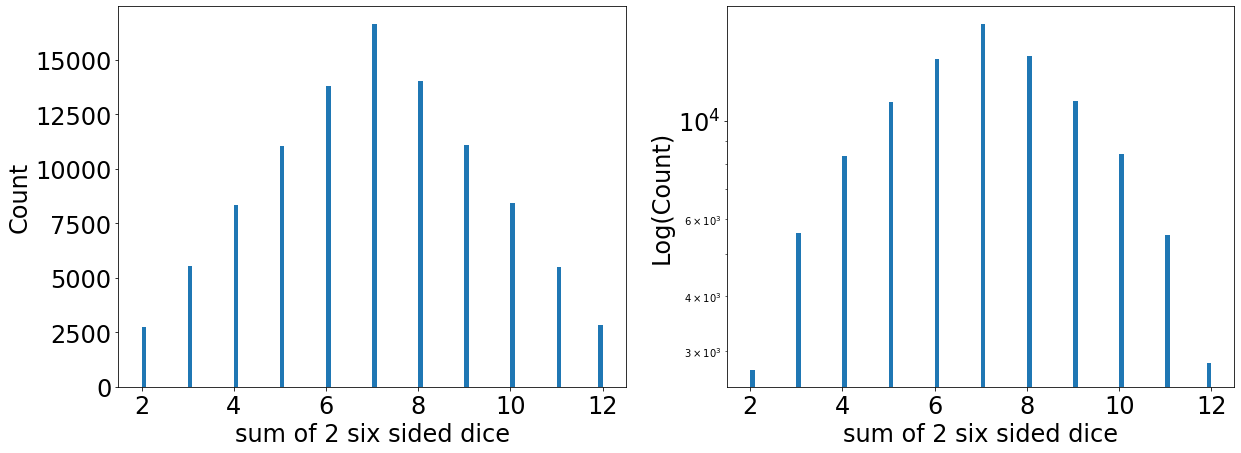

In [66]:
results = [];
for i in range(100000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    results.append(a + b)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7) 
ax[0].hist(results, 100)
ax[0].tick_params(labelsize = 24)
ax[0].set_xlabel("sum of 2 six sided dice", fontsize=24)
ax[0].set_ylabel("Count", fontsize=24)
ax[1].hist(results, 100)
ax[1].tick_params(labelsize = 24)
ax[1].set_yscale('log')
ax[1].set_xlabel("sum of 2 six sided dice", fontsize=24)
ax[1].set_ylabel("Log(Count)", fontsize=24)

<br> **3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.**

In [67]:
print("Mean of distribution is", np.mean(results))
print("Variance of distribution is", np.var(results))

Mean of distribution is 7.00808
Variance of distribution is 5.833414713600001


<br> **4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.**

Text(0, 0.5, 'Log(Count)')

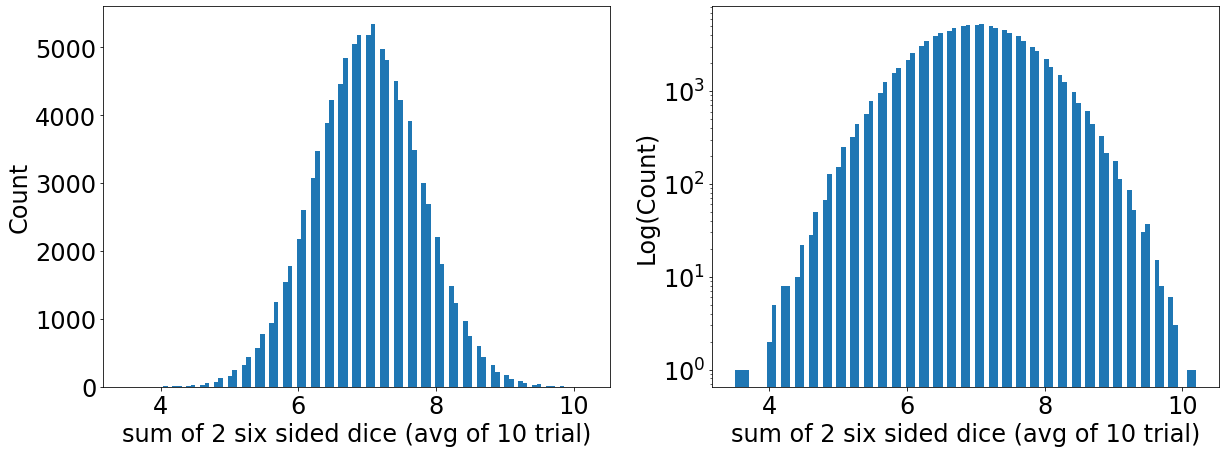

In [68]:
results = [];
for i in range(100000):
    results.append(0)
for i in range(10):
    for i in range(100000):
        a = random.randint(1,6)
        b = random.randint(1,6)
        results[i] += a + b;
results = np.divide(results, 10)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7) 
ax[0].hist(results, 100)
ax[0].tick_params(labelsize = 24)
ax[0].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=24)
ax[0].set_ylabel("Count", fontsize=24)
ax[1].hist(results, 100)
ax[1].tick_params(labelsize = 24)
ax[1].set_yscale('log')
ax[1].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=24)
ax[1].set_ylabel("Log(Count)", fontsize=24)

<br> It does look like a Gaussian distribution, in a bell shape.
<br> The reason might be, since we took the average of 10 trials for each measurements, then each measurements are tend to be closer to be the mean value, while getting a average value that is far from the mean value becomes rarer. 

<br> **5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.**

Standard diviation of distribution is 0.3167415349739032


Text(0, 0.5, 'Log(Count)')

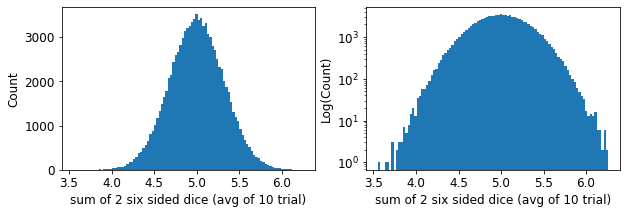

In [86]:
results = [];
for i in range(100000):
    results.append(0)
for i in range(10):
    d = stats.norm.rvs(loc = 5., scale = 1, size = 100000)
    results += d;
results = np.divide(results, 10)
print("Standard diviation of distribution is", np.std(results))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,3) 
ax[0].hist(results, 100)
ax[0].tick_params(labelsize = 12)
ax[0].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[1].hist(results, 100)
ax[1].tick_params(labelsize = 12)
ax[1].set_yscale('log')
ax[1].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=12)
ax[1].set_ylabel("Log(Count)", fontsize=12)


Standard diviation of distribution is 0.223589153867516


Text(0, 0.5, 'Log(Count)')

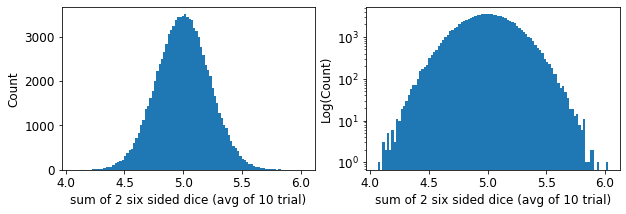

In [79]:
results = [];
for i in range(100000):
    results.append(0)
for i in range(20):
    d = stats.norm.rvs(loc = 5., scale = 1, size = 100000)
    results += d;
results = np.divide(results, 20)
print("Standard diviation of distribution is", np.std(results))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,3) 
ax[0].hist(results, 100)
ax[0].tick_params(labelsize = 12)
ax[0].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[1].hist(results, 100)
ax[1].tick_params(labelsize = 12)
ax[1].set_yscale('log')
ax[1].set_xlabel("sum of 2 six sided dice (avg of 10 trial)", fontsize=12)
ax[1].set_ylabel("Log(Count)", fontsize=12)


<br> From the two examples above, I sum and took the average of 10 and 20 trials each.
<br> The standard normal distribution has a std of 1. However, for the average of 10 trials distribution, the std is 0.3167415349739032, and for the average of 20 trials distribution, the std is 0.223589153867516.
<br> From inspection, I can see that, their std is narrowed by $ \sqrt {n}$ times, where n is the number of trials. For example, $1/\sqrt {10}=0.316$, and $1/\sqrt {20}=0.223$